### Business Understanding

#### In this ever-changing landscape of real estate market, it is very difficult to navigate without a proper set of services and tools. MLSListings Inc., is a technology company that serves agents/brokers across various California bay Area counties and provides them with listing information, services and training to succeed. But how do we target these trainings, tools and services to the set of subscribers who need them the most? To understand that, we can try to classify our subscribers into various performance buckets for example low, medium, and high. Then study the traits of the high performing subscribers and identify the missing traits from medium and low groups and extend our services.  As first step, I would like to work towards answering the questions given below to further reach the business objective.

What are the different characteristics that make a Real Estate Agent successful? 

What are the most effective factors that lead to the highest sales volume? 

Can we predict how successful a real estate agent is going to be given a set of features?


### Data Understanding

In order to answer the business questions, I am using 2 different datasets that will help use create a model

1. Listing Features -  This dataset contains the listing from the last 5 years 
2. Subscriber Features - This dataset includes various features of various Listing/Buying agents

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import median_absolute_error, mean_squared_error
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from scipy.special import exp10
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
# Let's first look at the listing dataset
# import dataset
df = pd.read_excel('data/listingdatahotsale.xlsx')


In [5]:
df.head()

,CountyName,LivingSqFt,WalkScore,Subclass,DaysOnMarket,DOM,SaleRate,PostalCode,Age,BedsTotal,...,HOAExistYN,FireplaceYN,PoolYN,NewConstructionYN,VirtualTour,openhousehours,openhousect,tourct,ElementaryRating,HighSchoolrating
0,Santa Clara,1248,58.0,101,1,48,9999,95118,64.0,3,...,1,1.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN
1,Monterey,1252,70.0,101,1,70,9999,93930,62.0,3,...,1,1.0,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN
2,Santa Clara,1487,41.0,103,1,37,9999,95014,47.0,3,...,1,0.0,1.0,0.0,1,4.0,2.0,NaN,NaN,NaN
3,Santa Clara,1459,91.0,101,1,37,9999,95020,98.0,4,...,1,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN
4,Santa Clara,2601,39.0,101,1,33,9999,95037,8.0,4,...,1,1.0,0.0,0.0,1,2.0,2.0,NaN,NaN,NaN


### EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53528 entries, 0 to 53527
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountyName         53528 non-null  object 
 1   LivingSqFt         53528 non-null  int64  
 2   WalkScore          53263 non-null  float64
 3   Subclass           53528 non-null  int64  
 4   DaysOnMarket       53528 non-null  int64  
 5   DOM                53528 non-null  int64  
 6   SaleRate           53528 non-null  int64  
 7   PostalCode         53528 non-null  int64  
 8   Age                53453 non-null  float64
 9   BedsTotal          53528 non-null  int64  
 10  BathsFull          53528 non-null  int64  
 11  SaleMonth          53528 non-null  int64  
 12  SaleYear           53528 non-null  int64  
 13  PhotoCount         53505 non-null  float64
 14  Commission         53528 non-null  float64
 15  GarageSpaces       50775 non-null  float64
 16  HOAExistYN         535

Text(0, 0.5, 'null count')

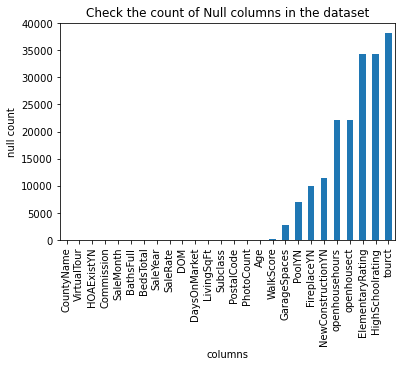

In [7]:
df.isnull().sum()
nullplot=df.isnull().sum().sort_values().plot(kind = 'bar',title="Check the count of Null columns in the dataset")
nullplot.set_xlabel("columns")
nullplot.set_ylabel("null count")

In [8]:
data.describe(include=[object]).T

NameError: name 'data' is not defined

Text(0, 0.5, 'SaleRate')

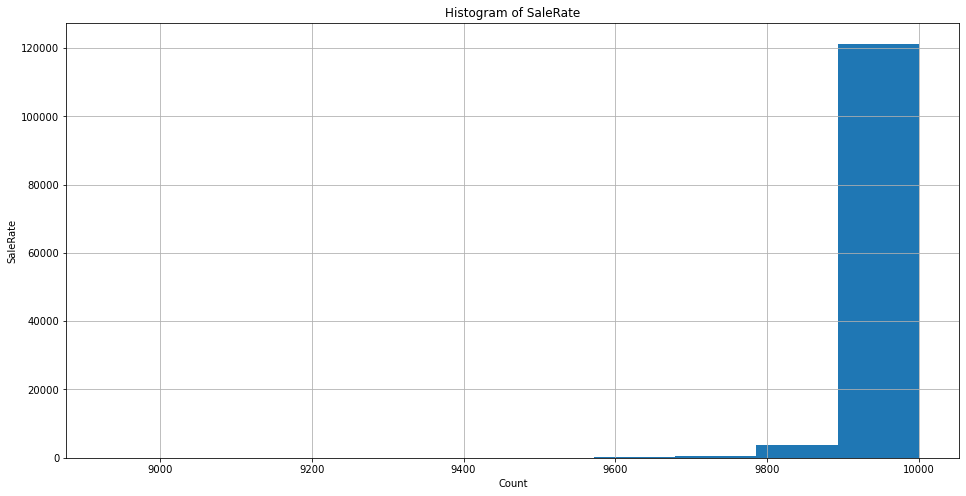

In [15]:
plt.figure(figsize=(16,8))
df["SaleRate"].hist()

plt.title('Histogram of SaleRate')
plt.xlabel('Count')
plt.ylabel('SaleRate')

Skewness: -10.482160


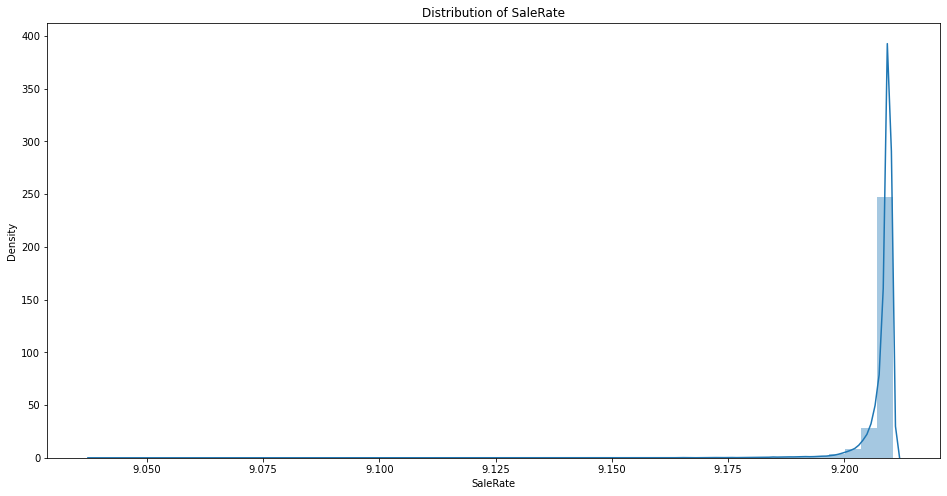

In [9]:
plt.figure(figsize=(16,8))
sns.distplot(np.log1p(df["SaleRate"]))

plt.title('Distribution of SaleRate')
print("Skewness: %f" % np.log1p(df["SaleRate"]).skew())

<AxesSubplot:title={'center':'SaleRate in various SubClasses of Property'}, xlabel='Subclass', ylabel='SaleRate'>

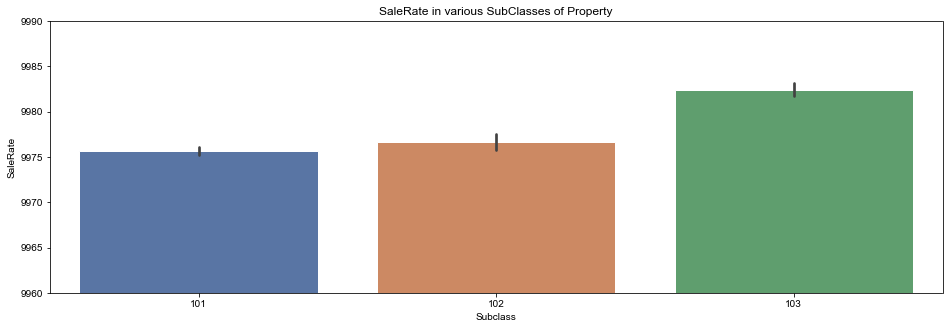

In [10]:
plt.figure(figsize=(16,5))
plt.title('SaleRate in various SubClasses of Property')
plt.ylim(9960, 9990)
sns.set(rc={'axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['Subclass'],df["SaleRate"])

<AxesSubplot:title={'center':'Sales by County'}, xlabel='SaleYear', ylabel='SaleRate'>

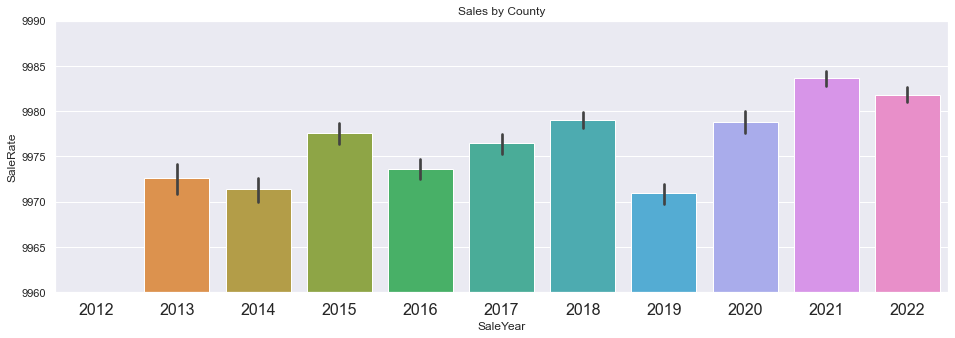

In [41]:
plt.figure(figsize=(16,5))
plt.title('Sales by County')
plt.ylim(9960, 9990)
sns.set(rc={'axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['SaleYear'],df["SaleRate"])

<AxesSubplot:title={'center':'Sale by Month'}, xlabel='SaleMonth', ylabel='SaleRate'>

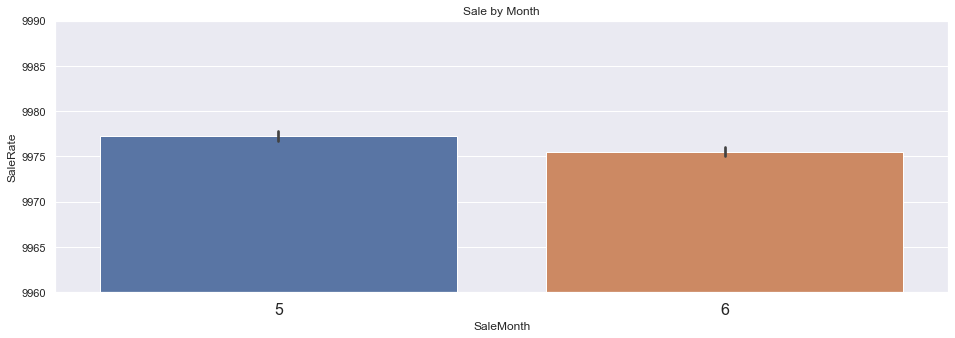

In [12]:
plt.figure(figsize=(16,5))
plt.title('Sale by Month')
plt.ylim(9960, 9990)
sns.set(rc={'axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['SaleMonth'],df["SaleRate"])

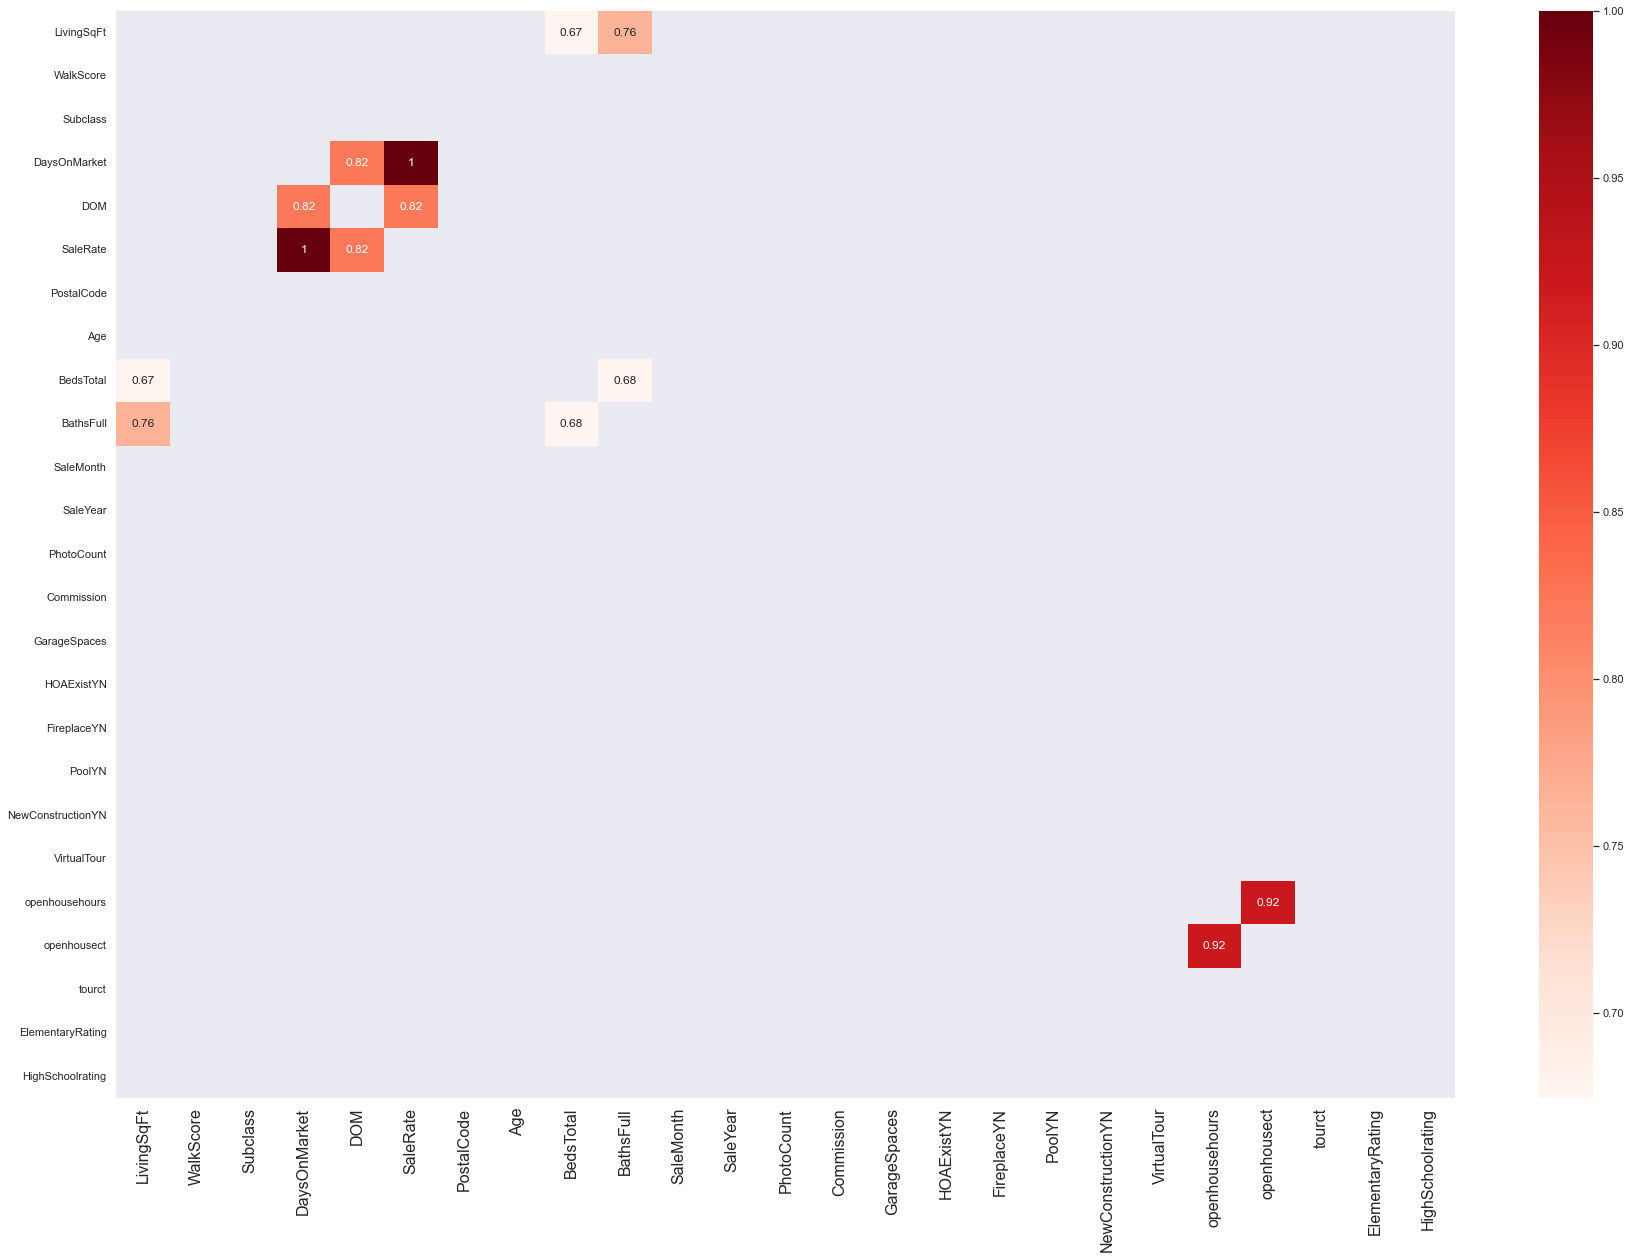

In [13]:
# create correlation matrix with abs values
corr_matrix = df.corr().abs()
threshold = 0.5
filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 
plt.figure(figsize=(30,20))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

C:\Users\svemoory\AppData\Local\Temp\ipykernel_27236\1768662143.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


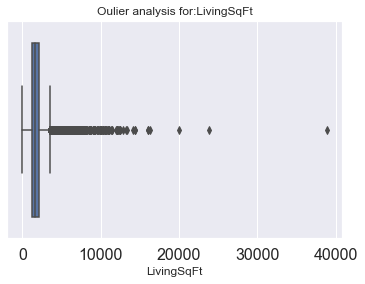

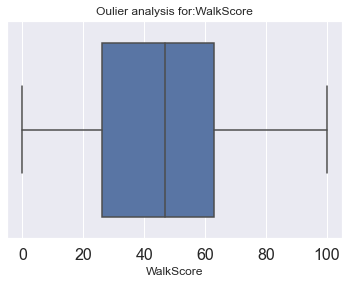

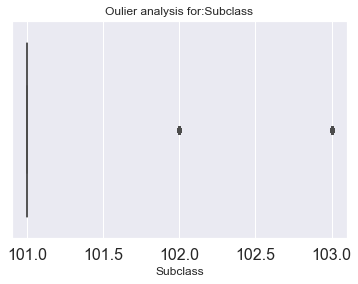

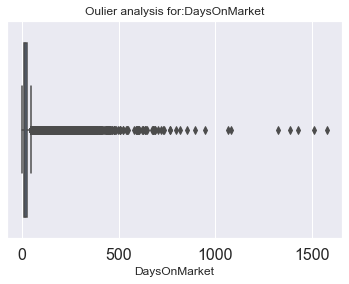

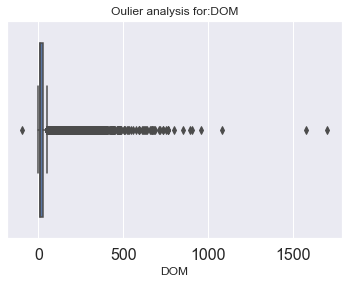

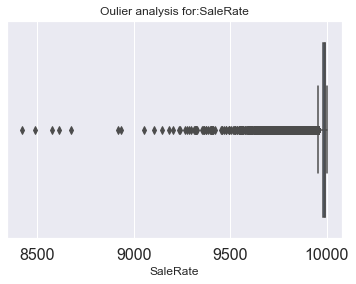

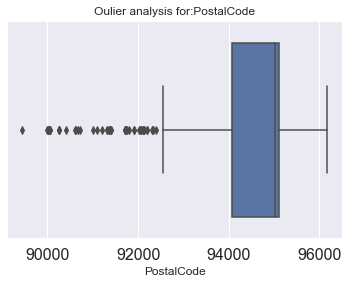

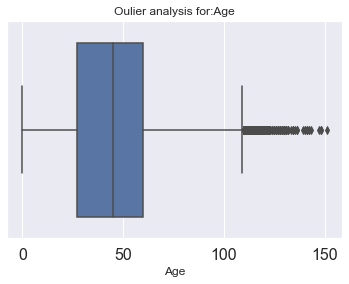

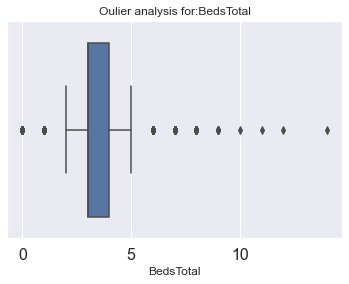

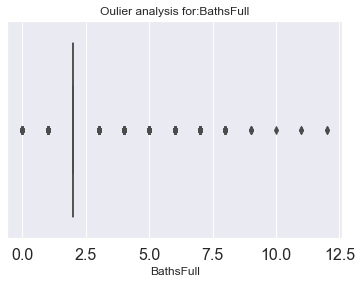

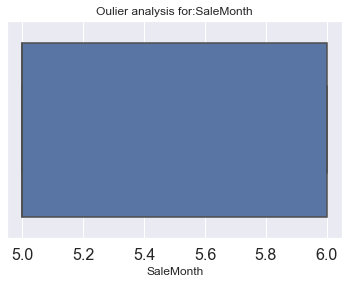

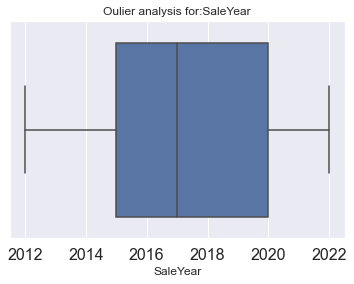

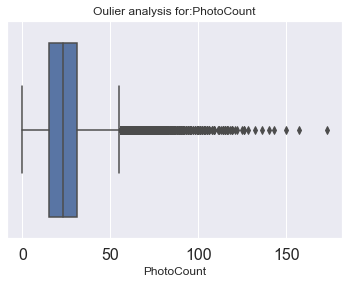

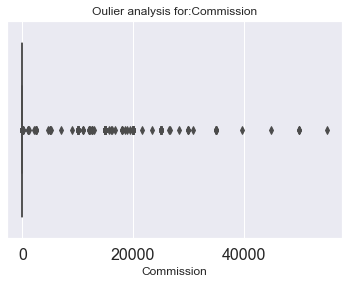

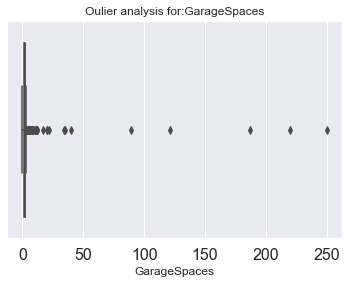

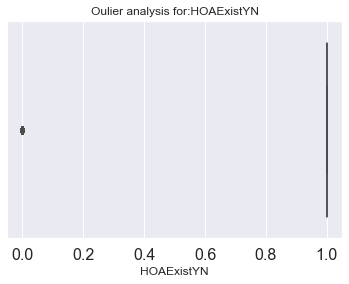

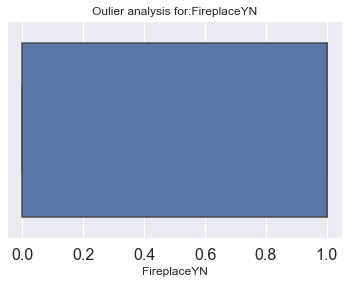

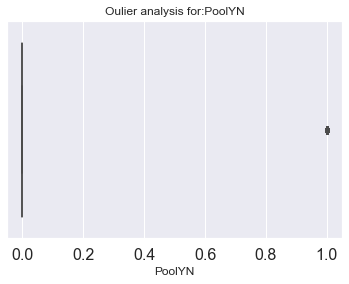

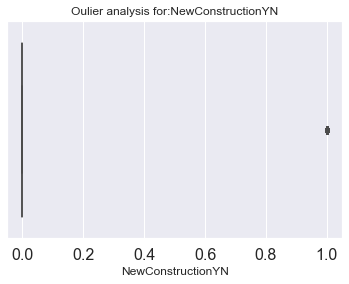

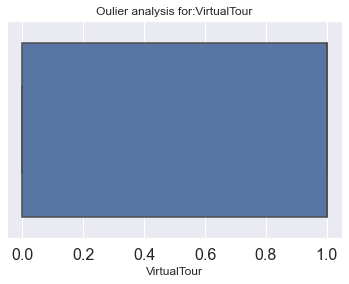

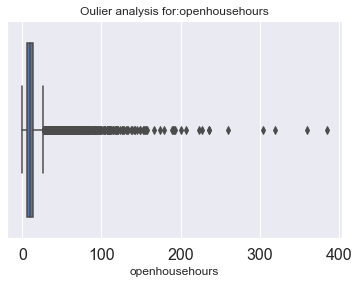

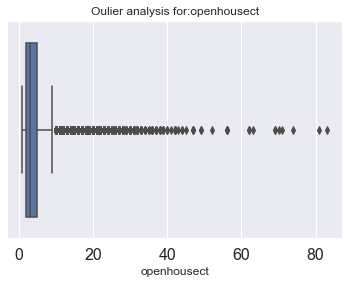

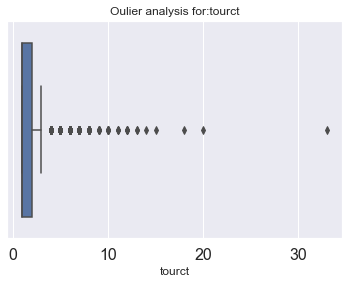

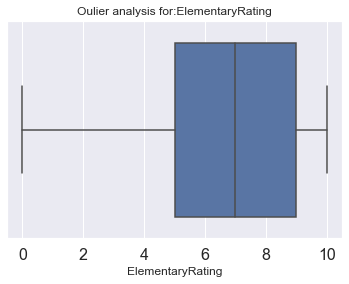

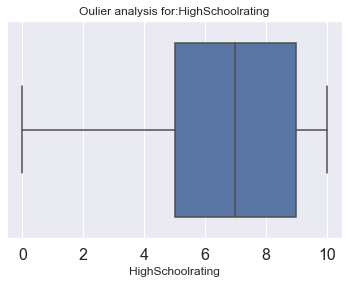

In [14]:
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
integer_columns

for i in integer_columns:
    plt.figure()
    sns.boxplot(x=df[i])
    plt.title('Oulier analysis for:'+i)

### Data Preparation

In [6]:
data_ro=df[df['LivingSqFt']<10000]
data_ro1=data_ro[data_ro['Subclass']<104]
data_ro2=data_ro1[data_ro1['BedsTotal']<7]
data_ro3=data_ro2[data_ro2['BathsFull']<4]
data_ro4=data_ro3[data_ro3['PhotoCount']<70]

In [57]:
df_sc = df[(df['LivingSqFt']<10000) & (df['BedsTotal']<7) & (df['BathsFull']<4) & (df['PhotoCount']<70) ]

In [82]:
df_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50551 entries, 0 to 53525
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CountyName         50551 non-null  object 
 1   LivingSqFt         50551 non-null  int64  
 2   WalkScore          50305 non-null  float64
 3   Subclass           50551 non-null  int64  
 4   DaysOnMarket       50551 non-null  int64  
 5   DOM                50551 non-null  int64  
 6   SaleRate           50551 non-null  int64  
 7   PostalCode         50551 non-null  int64  
 8   Age                50482 non-null  float64
 9   BedsTotal          50551 non-null  int64  
 10  BathsFull          50551 non-null  int64  
 11  SaleMonth          50551 non-null  int64  
 12  SaleYear           50551 non-null  int64  
 13  PhotoCount         50551 non-null  float64
 14  Commission         50551 non-null  float64
 15  GarageSpaces       48068 non-null  float64
 16  HOAExistYN         505

In [83]:
df_final=df_sc.drop(['tourct','HighSchoolrating','ElementaryRating','openhousect','openhousehours','NewConstructionYN','DaysOnMarket','DOM','SaleMonth','Subclass'], axis=1).dropna()
#data_modelling=data_clean.dropna()

In [84]:
X = df_final.drop('SaleRate', axis = 1)
y = df_final['SaleRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25550 entries, 36676 to 22106
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CountyName    25550 non-null  object 
 1   LivingSqFt    25550 non-null  int64  
 2   WalkScore     25550 non-null  float64
 3   Subclass      25550 non-null  int64  
 4   PostalCode    25550 non-null  int64  
 5   Age           25550 non-null  float64
 6   BedsTotal     25550 non-null  int64  
 7   BathsFull     25550 non-null  int64  
 8   SaleYear      25550 non-null  int64  
 9   PhotoCount    25550 non-null  float64
 10  Commission    25550 non-null  float64
 11  GarageSpaces  25550 non-null  float64
 12  HOAExistYN    25550 non-null  int64  
 13  FireplaceYN   25550 non-null  float64
 14  PoolYN        25550 non-null  float64
 15  VirtualTour   25550 non-null  int64  
dtypes: float64(7), int64(8), object(1)
memory usage: 3.3+ MB


In [85]:
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = median_absolute_error(baseline_train, y_train)
mse_baseline_test = median_absolute_error(baseline_test, y_test)
print(mse_baseline_train,mse_baseline_test)

12.229589041095096 12.12255707762597


In [88]:
ohe_cols=['CountyName']
num_cols=['LivingSqFt', 'WalkScore','PostalCode', 'Age',
 'BedsTotal',
 'BathsFull', 
 'SaleYear',
 'VirtualTour',
          'PhotoCount','Commission','GarageSpaces','HOAExistYN','FireplaceYN','PoolYN'
]

ordinal_ohe_transformer = make_column_transformer(
    (OneHotEncoder(drop="if_binary",handle_unknown='ignore'), ohe_cols),   

                        (StandardScaler(), num_cols),                          
                                          remainder='passthrough')

In [90]:
pipe1 = Pipeline([('transformer', ordinal_ohe_transformer), ('linreg', LinearRegression())])
pipe1.fit(X_train, y_train)
p1 = pipe1.predict(X_train)
p2 = pipe1.predict(X_test)
print(f'Train MAE: {mean_squared_error(y_train, p1)}')
print(f'Test MAE: {mean_squared_error(y_test, p2)}')
print(f'Accuracy Score: {pipe1.score(X_test,y_test)}')

Train MAE: 978.7084362660419
Test MAE: 1192.8428272986991
Accuracy Score: 0.04996990198940188


C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [91]:
pipe2 = make_pipeline(ordinal_ohe_transformer, TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=exp10
    ))
pipe2.fit(X_train, y_train)
    #fit on train
p1 = pipe2.predict(X_train)
p2 = pipe2.predict(X_test)
print(f'Train MAE: {mean_squared_error(y_train, p1)}')
print(f'Test MAE: {mean_squared_error(y_test, p2)}')
print(f'Accuracy Score: {pipe2.score(X_test,y_test)}')

Train MAE: 978.8761478114232
Test MAE: 1192.919920835724
Accuracy Score: 0.04990850146046388


C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [92]:
pipe4 = Pipeline([('transformer', ordinal_ohe_transformer), ('ridgereg', Ridge())])
pipe4.fit(X_train, y_train)
    #fit on train
p1 = pipe4.predict(X_train)
p2 = pipe4.predict(X_test)
print(f'Train MAE: {mean_squared_error(y_train, p1)}')
print(f'Test MAE: {mean_squared_error(y_test, p2)}')
print(f'Accuracy Score: {pipe4.score(X_test,y_test)}')

Train MAE: 979.0415665448754
Test MAE: 1192.1666332076304
Accuracy Score: 0.0505084513472136


C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [93]:
pipe5 = make_pipeline(ordinal_ohe_transformer, TransformedTargetRegressor( regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)))
pipe5.fit(X_train, y_train)
    #fit on train
p1 = pipe5.predict(X_train)
p2 = pipe5.predict(X_test)
print(f'Train MAE: {mean_squared_error(y_train, p1)}')
print(f'Test MAE: {mean_squared_error(y_test, p2)}')
print(f'Accuracy Score: {pipe5.score(X_test,y_test)}')

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Train MAE: 143.10773507410443
Test MAE: 1267.8287731484204
Accuracy Score: -0.009752052868938765


In [34]:
scoring = ['r2']
r_multi = permutation_importance(
    pipe5, X_test, y_test, n_repeats=30, random_state=0, scoring=scoring)

for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {X_test.columns[i]:<8}"
                  f"  {r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: Us

r2
    DaysOnMarket  2.031 +/- 0.018
    BathsFull  0.001 +/- 0.000
    SaleYear  0.001 +/- 0.000
    LivingSqFt  0.001 +/- 0.000
    PoolYN    0.000 +/- 0.000
    GarageSpaces  0.000 +/- 0.000


C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [97]:
param_dict = {'ridge__regressor__alpha': np.logspace(0, 10, 20)}
pipev2 = Pipeline([( 'ridge', TransformedTargetRegressor(regressor=Ridge(), func=np.log10, inverse_func=exp10)) ])
grid = GridSearchCV(estimator=pipev2, param_grid=param_dict)
grid_2 = make_pipeline(ordinal_ohe_transformer, grid)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_2_train_mse = median_absolute_error(y_train, train_preds)
model_2_test_mse = median_absolute_error(y_test, test_preds)
print(f'Train MAE: {model_2_train_mse}')
print(f'Test MAE: {model_2_test_mse}')
print(f'Best Alpha: {grid.best_params_}')

Train MAE: 22.55126253023991
Test MAE: 22.220923843836317
Best Alpha: {'ridge__regressor__alpha': 1.0}


In [98]:
print(f'Best Alpha: {grid.accuracy}')

AttributeError: 'GridSearchCV' object has no attribute 'accuracy'

In [99]:
grid.score(X_train, y_train)

C:\Users\svemoory\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Monterey'